In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier


#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#class imbalance 

data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
X = data.drop(labels='Class',axis=1)
Y = data['Class']

In [6]:
type(X)

pandas.core.frame.DataFrame

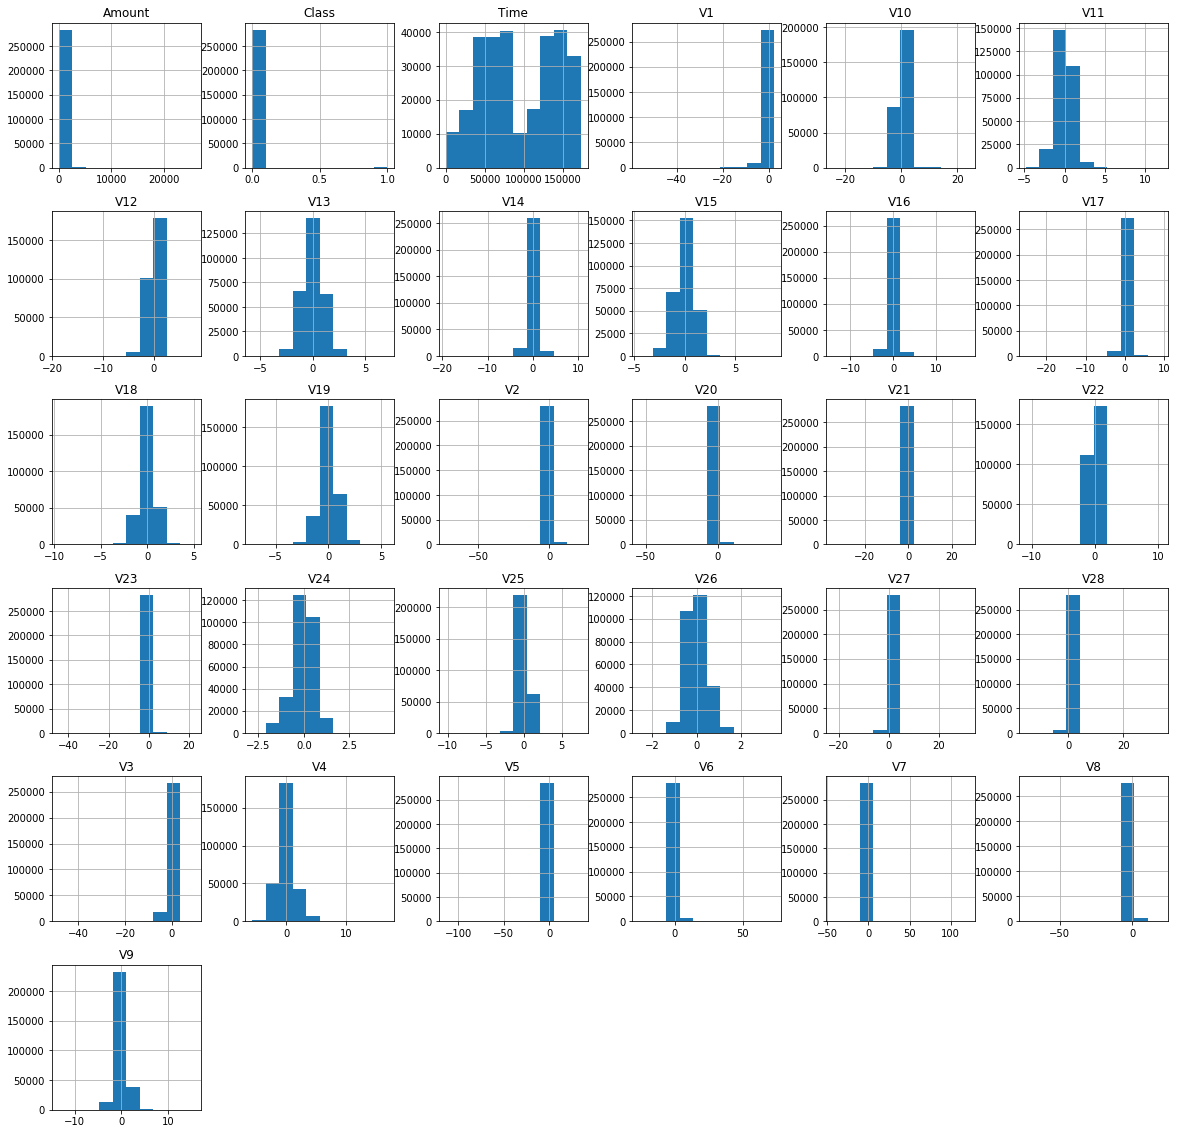

In [7]:
data.hist(figsize = (20, 20))
plt.show()

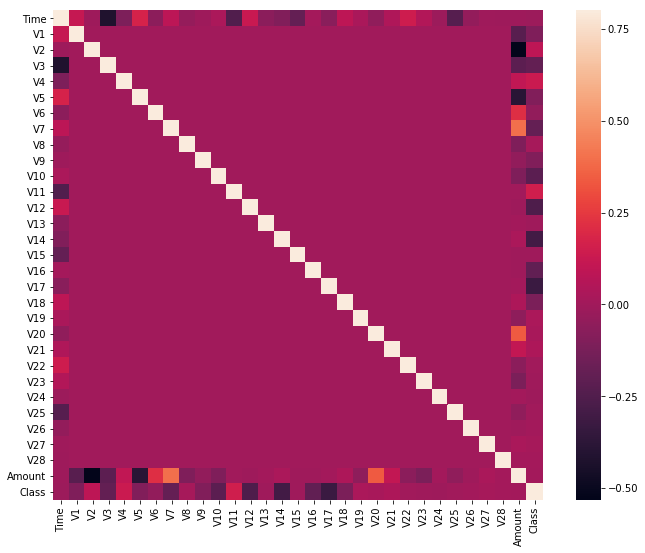

In [39]:


# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()



# Feature Engineering

In [6]:
SS = StandardScaler()
X['normAmount'] = SS.fit_transform(X['Amount'].values.reshape(-1, 1))
X = X.drop(['Time','Amount'],axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [7]:
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

In [8]:
x_train.shape,x_test.shape

((227845, 29), (56962, 29))

#  Model Fitting

# Simple Neural Network

In [15]:
model = Sequential([
    Dense(units=16,input_dim = 29, activation = 'relu'),
    Dense(units=24, activation = 'relu'),
    Dropout(0.5),
    Dense(units=20, activation = 'relu'),
    Dense(units=24, activation = 'relu'),
    Dense(units=1, activation = 'sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
227845/227845 [==============================] - 13s 56us/step - loss: 0.0086 - acc: 0.9985
Epoch 2/5
227845/227845 [==============================] - 12s 53us/step - loss: 0.0041 - acc: 0.9993
Epoch 3/5
227845/227845 [==============================] - 12s 53us/step - loss: 0.0038 - acc: 0.9993
Epoch 4/5
227845/227845 [==============================] - 12s 55us/step - loss: 0.0036 - acc: 0.9993
Epoch 5/5
227845/227845 [==============================] - 13s 55us/step - loss: 0.0034 - acc: 0.9994


In [32]:
print(model.evaluate(x_test,y_test))

56962/56962 [==============================] - 1s 9us/step
[0.003204461967167914, 0.9995259997893332]


In [9]:
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

# Logistic Regression

In [34]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X,Y,'LogisticRegression_norm',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 39.4min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]
Best Params : {'C': 166.81005372000593, 'penalty': 'l1'}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9992977774656788
Confusion Matrix : 
 [[56859     9]
 [   31    63]]


# XgBoost

In [35]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,Y,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 20.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 20.6min finished


[0 0 0 ... 0 0 0]
Best Params : {'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.98      0.84      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9997015554229135
Confusion Matrix : 
 [[56866     2]
 [   15    79]]


# Random Forest

In [36]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,Y,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 55.5min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 57.7min finished


[0 0 0 ... 0 0 0]
Best Params : {'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.82      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9996839998595555
Confusion Matrix : 
 [[56867     1]
 [   17    77]]


# SVC

In [37]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X,Y,'SVC_norm',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 593.5min finished


[0 0 0 ... 0 0 0]
Best Params : {'C': 100, 'gamma': 0.005}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.96      0.82      0.89        94

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9996488887328394
Confusion Matrix : 
 [[56865     3]
 [   17    77]]


# Balancing the Dataset

# Under Sampling

In [12]:
from imblearn.under_sampling import NearMiss

In [13]:
sm =NearMiss(version=2,random_state=42)
X_res , Y_res = sm.fit_resample(X,Y)
pd.Series(Y_res).value_counts()

1    492
0    492
dtype: int64

In [14]:
X_res.shape,X.shape

((984, 29), (284807, 29))

# Logistics Regression

In [17]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res,Y_res,'LogisticRegression_US',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.5s remaining:    0.4s


[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'C': 7.742636826811269, 'penalty': 'l1'}
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.94        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Accuracy Score : 0.9441624365482234
Confusion Matrix : 
 [[96  6]
 [ 5 90]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# XGBOOST


In [15]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'XGBoost_US',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    5.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.7s finished


[1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98        95

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

Accuracy Score : 0.9796954314720813
Confusion Matrix : 
 [[98  4]
 [ 0 95]]


# Random Forest

In [16]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'Random Forest_US',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    3.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.4s finished


[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.98      0.99      0.98        95

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

Accuracy Score : 0.9847715736040609
Confusion Matrix : 
 [[100   2]
 [  1  94]]


# Neural Network

In [20]:
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res, test_size = 0.2)
x_train.shape

(787, 29)

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
787/787 [==============================] - 1s 722us/step - loss: 0.6199 - acc: 0.6938
Epoch 2/5
787/787 [==============================] - 0s 53us/step - loss: 0.4367 - acc: 0.8501
Epoch 3/5
787/787 [==============================] - 0s 54us/step - loss: 0.3657 - acc: 0.8895
Epoch 4/5
787/787 [==============================] - 0s 56us/step - loss: 0.2936 - acc: 0.9161
Epoch 5/5
787/787 [==============================] - 0s 56us/step - loss: 0.2581 - acc: 0.9263


In [22]:
print(model.evaluate(x_test,y_test))

197/197 [==============================] - 0s 354us/step
[0.17325389597016544, 0.9543147211147444]


# Over Sampling

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
sm =SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,Y)

In [13]:
pd.Series(Y_res_OS).value_counts()

1    284315
0    284315
dtype: int64

# Neural Network

In [16]:
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res_OS,Y_res_OS, test_size = 0.2)
x_train.shape

(454904, 29)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5,validation_data=[x_test,y_test])

Instructions for updating:
Use tf.cast instead.
Train on 454904 samples, validate on 113726 samples
Epoch 1/5
454904/454904 [==============================] - 30s 67us/step - loss: 0.0442 - acc: 0.9838 - val_loss: 0.0163 - val_acc: 0.9954
Epoch 2/5
454904/454904 [==============================] - 30s 65us/step - loss: 0.0177 - acc: 0.9949 - val_loss: 0.0106 - val_acc: 0.9977
Epoch 3/5
454904/454904 [==============================] - 30s 65us/step - loss: 0.0129 - acc: 0.9967 - val_loss: 0.0083 - val_acc: 0.9980
Epoch 4/5
454904/454904 [==============================] - 30s 65us/step - loss: 0.0115 - acc: 0.9971 - val_loss: 0.0073 - val_acc: 0.9985
Epoch 5/5
454904/454904 [==============================] - 30s 65us/step - loss: 0.0100 - acc: 0.9975 - val_loss: 0.0072 - val_acc: 0.9984


In [18]:
print(model.evaluate(x_test,y_test))

113726/113726 [==============================] - 1s 9us/step
[0.007239821667997645, 0.9983556970261858]


# Logistics Regression

In [31]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res_OS,Y_res_OS,'LogisticRegression_OS',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.0min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1 1 0 ... 0 1 1]
Best Params : {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56989
           1       0.97      0.92      0.95     56737

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy Score : 0.9468898932522026
Confusion Matrix : 
 [[55637  1352]
 [ 4688 52049]]


# SVC

In [20]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005]
        }
FitModel(X_res_OS,Y_res_OS,'SVC_norm',SVC(),param,cv=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 206.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 321.4min finished


[1 1 0 ... 0 1 1]
Best Params : {'C': 1000, 'gamma': 0.005}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56989
           1       1.00      1.00      1.00     56737

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy Score : 0.9993053479415437
Confusion Matrix : 
 [[56910    79]
 [    0 56737]]
